## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [156]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/property_dataset.csv')
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [158]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [160]:
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [161]:
df.isnull().sum()/df.shape[0]*100

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [162]:
imputer = SimpleImputer(strategy='most_frequent')
dfimputer= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
dfimputer.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [163]:
dfimputer.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [164]:
if 'Nama Daerah' in dfimputer.columns:
    dfimputer = dfimputer.drop(columns=['Nama Daerah'])

# Display the first five rows of the modified dataset
dfimputer.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [165]:
label_encoder = LabelEncoder()

area_category_map = {"Standard" : 3, "Below Standard": 4, "Sangat Premium": 1, "Premium": 2}
terjual_map = { "Belum": 1}
lebar_jalan_map = {"1-2 Mobil": 2, "< 1 Mobil":1, "> 2 Mobil": 3}
dfimputer['Area Category'] = dfimputer['Area Category'].map(area_category_map)
dfimputer['Terjual/Belum'] = dfimputer['Terjual/Belum'].map(terjual_map)
dfimputer['Arah Hadap Rumah'] = label_encoder.fit_transform(dfimputer['Arah Hadap Rumah'])
dfimputer['Posisi Rumah'] = label_encoder.fit_transform(dfimputer['Posisi Rumah'])
dfimputer['Lebar Jalan Depan Rumah (ROW)'] = dfimputer['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_map)

dfimputer.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [166]:
dfimputer['Harga Penawaran (dari Owner)'] = dfimputer['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")

dfimputer['Harga Penawaran (dari Owner)'] = dfimputer['Harga Penawaran (dari Owner)'].str.replace(r"[.,]", "", regex=True)

check the data type

In [167]:
dfimputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [168]:
for col in dfimputer.select_dtypes(include=['object']).columns:
    dfimputer[col] = dfimputer[col].astype(int)

In [169]:
dfimputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [170]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = dfimputer.select_dtypes(include=['int64']).columns
dfimputer[numeric_cols] = scaler.fit_transform(dfimputer[numeric_cols])
dfimputer.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

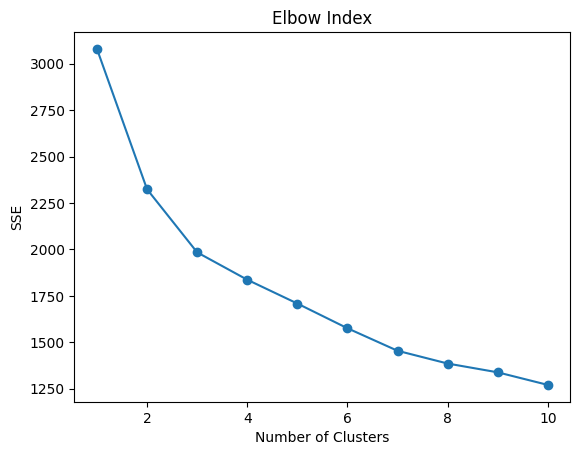

In [171]:
sse=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(dfimputer)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")
plt.show()
#

In [172]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is", best_k)

the best k for your model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [173]:
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
kmeans.fit(dfimputer)
labels = kmeans.labels_

In [174]:
from sklearn.preprocessing import StandardScaler
dfimputer['KMeans'] = kmeans.labels_
dfimputer[numeric_cols] = scaler.inverse_transform(dfimputer[numeric_cols])
dfimputer.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [175]:
# aggregation
cluster = dfimputer.groupby(y_pred).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

cluster = cluster.rename_axis("KMeans")

cluster_trans = cluster.T

new_columns = [f"Cluster {col}" for col in cluster_trans.columns]
cluster_trans.columns = pd.Index(new_columns, name="KMeans")

cluster_trans


KMeans                                   Cluster 0      Cluster 1
Area Category                 mode             3.0            1.0
                              min              1.0            1.0
                              max              4.0            3.0
Luas Tanah (m2)               mean      218.934211         836.25
                              min             14.0          600.0
                              max           1561.0         1000.0
Luas Bangunan (m2)            mean      257.368421          975.0
                              min             14.0          600.0
                              max           1100.0         1200.0
Jumlah Kamar                  mode             4.0            7.0
                              min              1.0            5.0
                              max             13.0            7.0
Jumlah Kamar Mandi            mode             3.0            5.0
                              min              1.0            5.0
                              max             13.0            8.0
Tingkat/Lantai                mode             2.0            2.0
                              min              1.0            1.0
                              max              4.0            3.0
Harga Penawaran (dari Owner)  mean  4317121192.125  57999997500.0
                              min      160000000.0  35000000000.0
                              max    28500000000.0  99000000000.0
Terjual/Belum                 mode             1.0            1.0
Arah Hadap Rumah              mode             3.0            3.0
Posisi Rumah                  mode             2.0            2.0
Lebar Jalan Depan Rumah (ROW) mode             2.0     [2.0, 3.0]

In [176]:
# count data from each cluster
dfimputer['KMeans'].value_counts().sort_index()

,count
KMeans,
0,156
1,50
2,102


In [177]:
# write down your interpretation from the cluster that you have been made
# Cluster 0 represents moderate-sized properties  at mid-range prices, targeting to middle-class buyers who maybe have bigger families.
# Cluster 1 represents bigger and probably more luxurious properties, targeting high-income buyers or investors.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

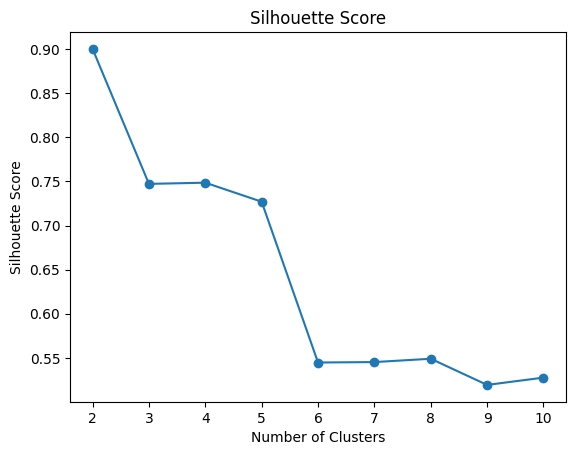

The best number of clusters is: 2


In [178]:
silhouette_scores = []

# Assuming 'best_k' was intended instead of 'k'
for i in range(2, 11):
    # Changed 'k' to 'best_k' or 'i' - chose 'i' to iterate through the range of cluster numbers
    agglomerative = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = fcluster(linkage(dfimputer, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(dfimputer, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

#Find the best k based on silhouette scores
a = range(2, 11)
best_k = a[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [179]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = agglo.fit_predict(dfimputer)

In [180]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
dfimputer['AgglomerativeCluster'] = y_pred
# show the df
dfimputer.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,AgglomerativeCluster
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,0
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,0


Display the cluster summary in the form of a dataframe.

In [181]:

# Function to calculate mode for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Repeat for Agglomerative Clustering
agglo_summary1 = dfimputer.groupby(y_pred).agg({
    'Area Category': [mode, 'min', 'max'],
    'Luas Tanah (m2)' : ['mean', 'min', 'max'],
    'Luas Bangunan (m2)' : ['mean', 'min', 'max'],
    'Jumlah Kamar' : [mode, 'min', 'max'],
    'Jumlah Kamar Mandi' : [mode, 'min', 'max'],
    'Tingkat/Lantai ' : [mode, 'min', 'max']
})

# Display summaries
agglo_summary1 = agglo_summary1.rename_axis('agglo')
agglo_summary1

Area Category           Luas Tanah (m2)                 \
               mode  min  max            mean    min     max   
agglo                                                          
0               3.0  1.0  4.0      218.934211   14.0  1561.0   
1               1.0  1.0  3.0      836.250000  600.0  1000.0   

      Luas Bangunan (m2)                Jumlah Kamar             \
                    mean    min     max         mode  min   max   
agglo                                                             
0             257.368421   14.0  1100.0          4.0  1.0  13.0   
1             975.000000  600.0  1200.0          7.0  5.0   7.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
agglo                                                          
0                    3.0  1.0  13.0             2.0  1.0  4.0  
1                    5.0  5.0   8.0             2.0  1.0  3.0

In [182]:
agglo_summary2 = dfimputer.groupby(y_pred).agg({
    'Harga Penawaran (dari Owner)' : ['mean', 'min', 'max'],
    'Terjual/Belum' : [mode],
    'Arah Hadap Rumah' : [mode],
    'Posisi Rumah' : [mode],
    'Lebar Jalan Depan Rumah (ROW)' : [mode]
})

# Display summaries
agglo_summary2 = agglo_summary2.rename_axis('agglo')
agglo_summary2

Harga Penawaran (dari Owner)                             Terjual/Belum  \
                              mean           min           max          mode   
agglo                                                                          
0                     4.317121e+09  1.600000e+08  2.850000e+10           1.0   
1                     5.800000e+10  3.500000e+10  9.900000e+10           1.0   

      Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah (ROW)  
                  mode         mode                          mode  
agglo                                                              
0                  3.0          2.0                           2.0  
1                  3.0          2.0                           2.0

In [183]:
dfimputer['AgglomerativeCluster'].value_counts().sort_index()

,count
AgglomerativeCluster,
0,304
1,4


**Hierarchical Visualization**

Single Linkage

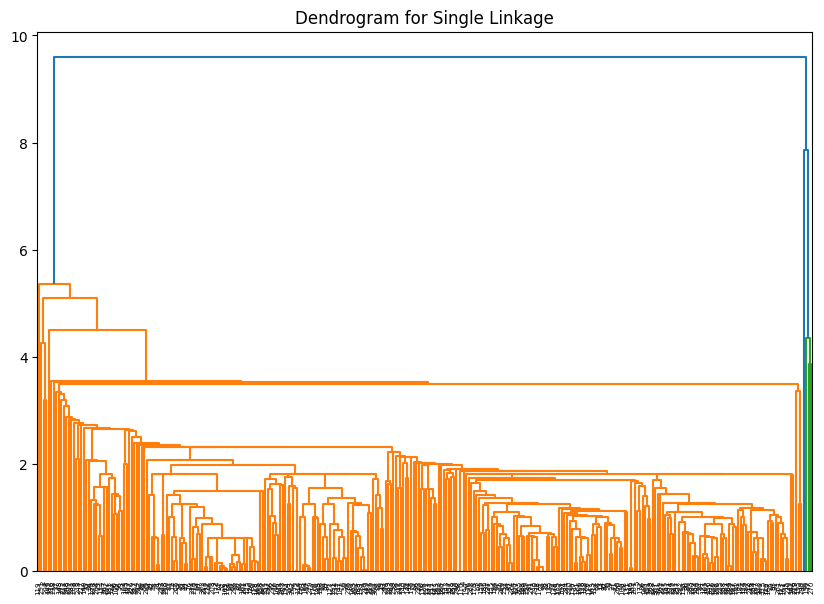

In [185]:
df_scaled = pd.DataFrame(sc.fit_transform(dfimputer), columns=dfimputer.columns)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.show()

complete linkage

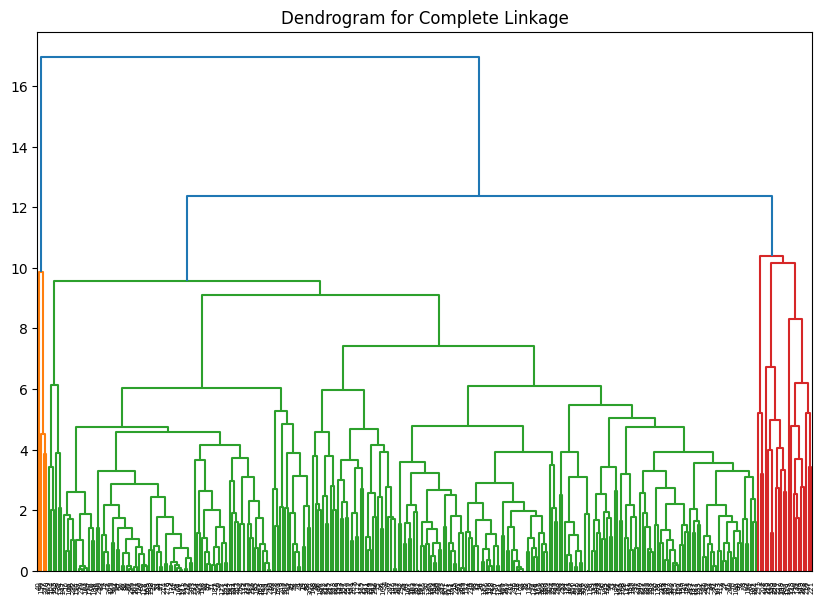

In [186]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()

average linkage

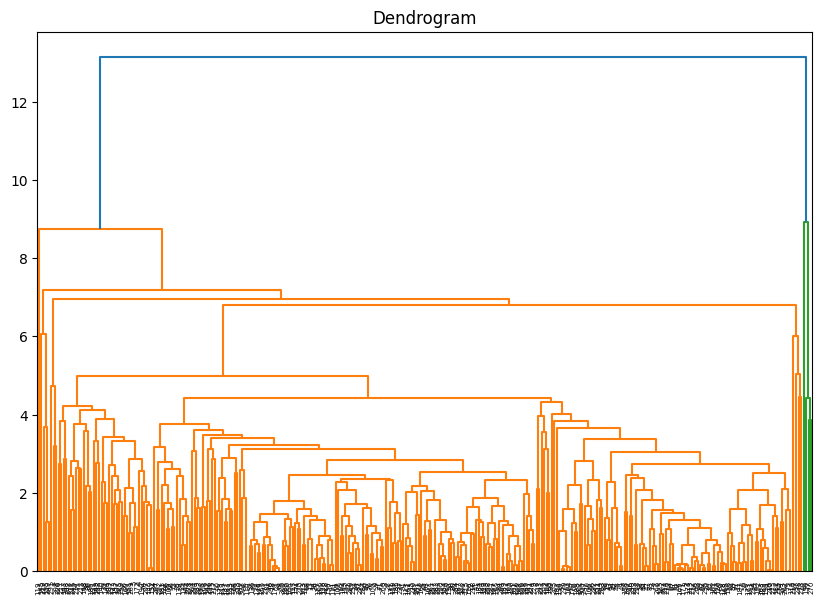

In [187]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

ward method

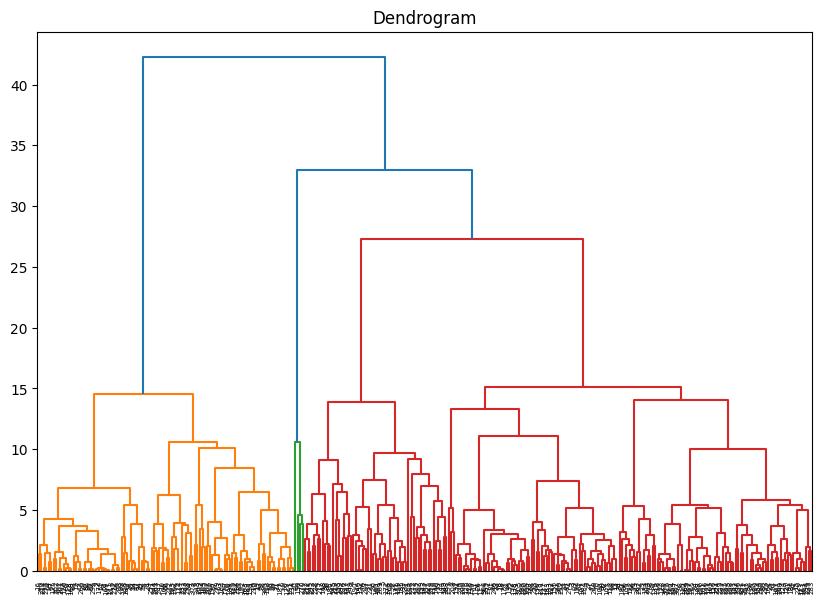

In [188]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()